# Import libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from keras.utils import to_categorical, normalize
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Flatten, Dense, Activation, Dropout
from sklearn.metrics import confusion_matrix

# Import and read data

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.shape, df_test.shape

((42000, 785), (28000, 784))

In [3]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split X and y

In [4]:
y_train = df_train['label'].astype('float32')
df_train = df_train.drop(['label'],axis = 1).astype('int32')
df_test = df_test.astype('float32')
df_train.shape, y_train.shape, df_test.shape

((42000, 784), (42000,), (28000, 784))

# Exploratory Data Analysis (EDA)

## Target Variable

1.0    4684
7.0    4401
3.0    4351
9.0    4188
2.0    4177
6.0    4137
0.0    4132
4.0    4072
8.0    4063
5.0    3795
Name: label, dtype: int64

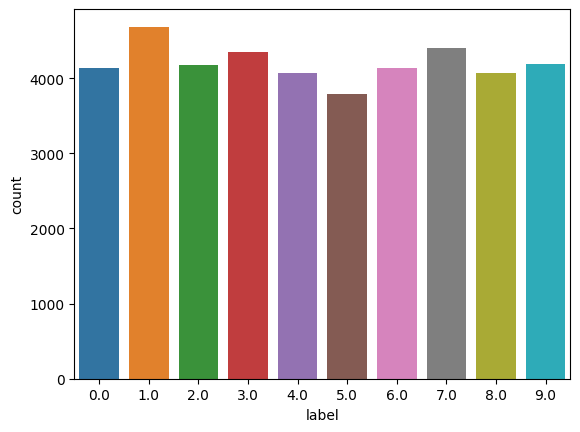

In [5]:
sns.countplot(x=y_train)

y_train.value_counts()

## Data visualization

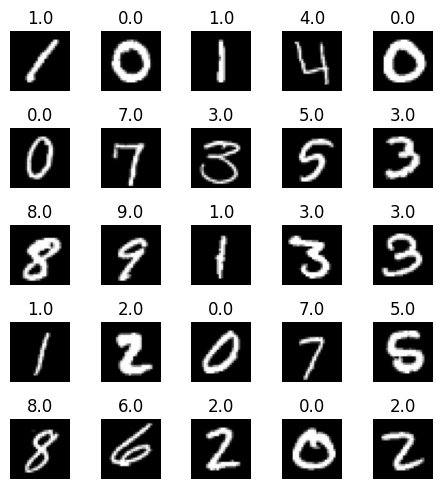

In [6]:
indexes = np.random.randint(0, df_train.shape[0], size=25)

# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    plt.imshow(df_train.values[i].reshape(28,28), cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
    plt.tight_layout()
plt.show()

# Data Preprocessing

## Reshape and Normalize

In [7]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
df_train = df_train.values.reshape(-1,28,28,1)
df_train = df_train / 255.0

df_test = df_test.values.reshape(-1,28,28,1)
df_test = df_test / 255.0

df_train.shape, df_test.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

## One-Hot Encoding the y_train

In [8]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(y_train, 10)
y_train.shape

(42000, 10)

In [9]:
y_train[0:5,:]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Modeling

## Split the train and the validation set

In [10]:
X_train, X_val, y_train, y_val = train_test_split(df_train, y_train, test_size = 0.1, random_state=42)

## Data augmentation

- Data augmentation is used to create more data from the current set we have, here, using the Keras API for data augmentation (ImageDataGenerator), we can generate more samples while feeding the model, the new data is created adding some noise to the real data.
- In this case data augmentation seems to be very useful, as we saw most of the data seems to be the original one but with a bit of distortion.

In [11]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

## Model

### Setting network parameters

In [12]:
epochs = 45
batch_size = 86
dropout = 0.50

In [13]:
model = Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(dropout),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])
mfit = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_val,y_val))

Epoch 1/45
440/440 [==============================] - 10s 22ms/step - loss: 0.7261 - accuracy: 0.7684 - val_loss: 0.2048 - val_accuracy: 0.9379
Epoch 2/45
440/440 [==============================] - 9s 20ms/step - loss: 0.2860 - accuracy: 0.9131 - val_loss: 0.1553 - val_accuracy: 0.9540
Epoch 3/45
440/440 [==============================] - 9s 21ms/step - loss: 0.2275 - accuracy: 0.9304 - val_loss: 0.1379 - val_accuracy: 0.9583
Epoch 4/45
440/440 [==============================] - 9s 22ms/step - loss: 0.1962 - accuracy: 0.9409 - val_loss: 0.1169 - val_accuracy: 0.9602
Epoch 5/45
440/440 [==============================] - 9s 21ms/step - loss: 0.1740 - accuracy: 0.9457 - val_loss: 0.1018 - val_accuracy: 0.9679
Epoch 6/45
440/440 [==============================] - 9s 21ms/step - loss: 0.1665 - accuracy: 0.9491 - val_loss: 0.0866 - val_accuracy: 0.9733
Epoch 7/45
440/440 [==============================] - 10s 22ms/step - loss: 0.1530 - accuracy: 0.9544 - val_loss: 0.1026 - val_accuracy: 0.96

### Model loss and accuracy graph

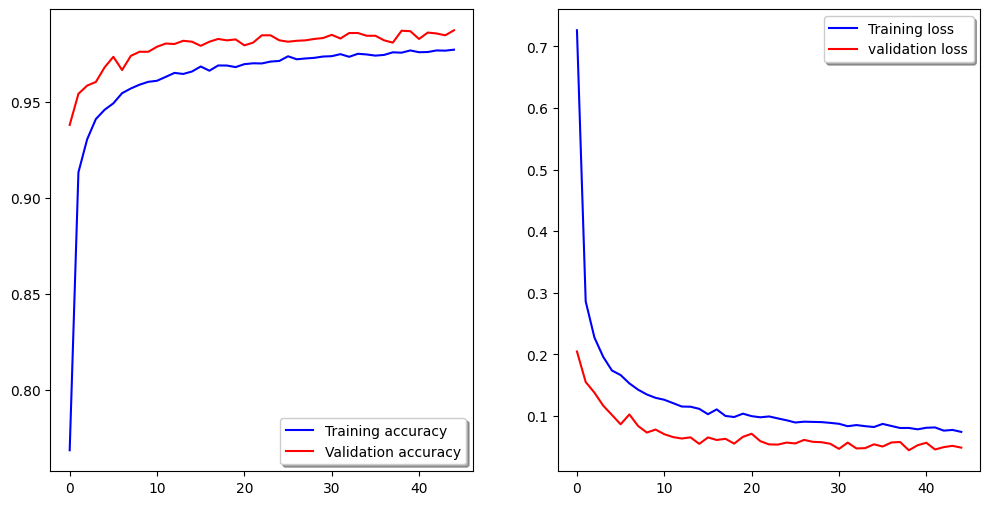

In [14]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(mfit.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(mfit.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(mfit.history['loss'], color='b', label="Training loss")
ax[1].plot(mfit.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

### Score

In [15]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04869334399700165
Test accuracy: 0.9871428608894348


### Confusion Matrix

132/132 [==============================] - 0s 1ms/step


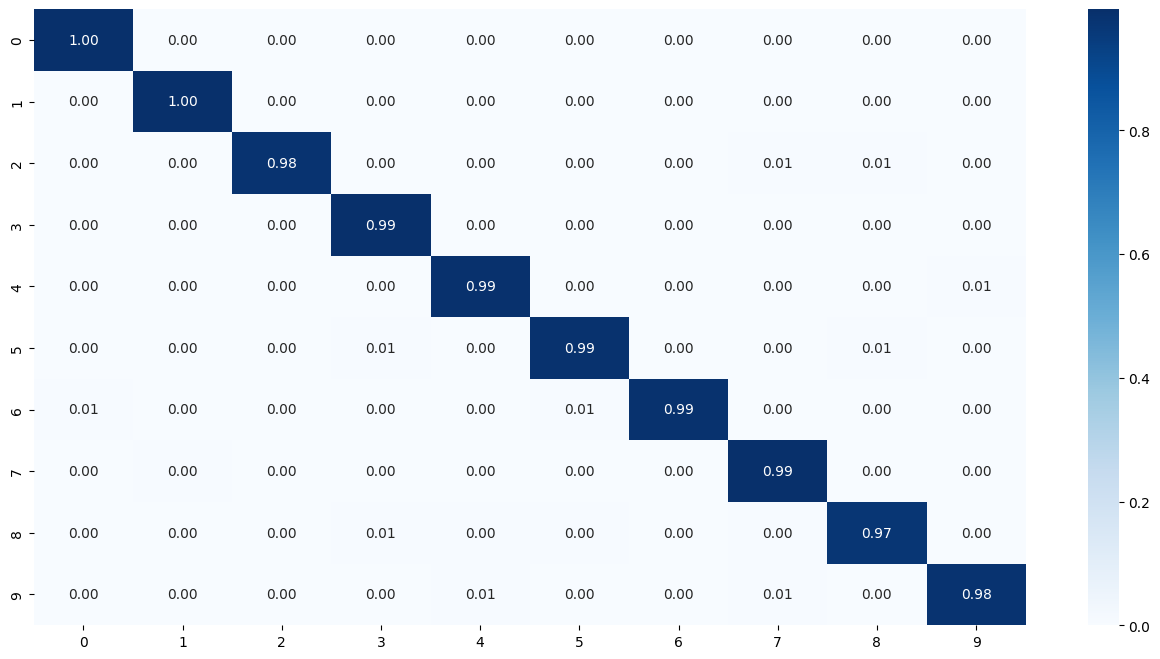

In [16]:
def plot_confusion_matrix(cnf_matrix, labels):
    cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
    plt.figure(figsize=(16,8))
    sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")

# Predict the values from the validation dataset
y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 

#Confution Matrix
cm = confusion_matrix(y_true, y_pred_classes) 
plot_confusion_matrix(cm, range(10))

### Display some error results

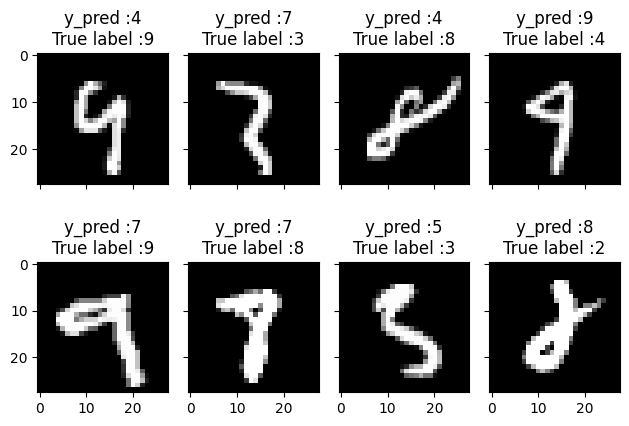

In [17]:
# A big thanks: https://www.kaggle.com/code/aishwarya2210/prediction-of-digits-from-handwritten-images

# Errors are difference between predicted labels and true labels
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 4
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape(28,28), cmap='gray')
            ax[row,col].set_title("y_pred :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            plt.tight_layout()

# Probabilities of the wrong predicted numbers
y_pred_errors_prob = np.max(y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-10:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, y_pred_classes_errors, y_true_errors)

# Predict and Submission

In [18]:
# predict results
results = model.predict(df_test)

# select the index with the maximum probability
results = np.argmax(results,axis = 1)

875/875 [==============================] - 1s 999us/step


In [19]:
# Submit
ss = pd.read_csv('sample_submission.csv')
ss['Label'] = results
ss.to_csv('submission.csv', index=False)